<a href="https://colab.research.google.com/github/mohammed1faisal/Student_data_python/blob/main/student_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving Expanded_data_with_more_features.csv to Expanded_data_with_more_features.csv
User uploaded file "Expanded_data_with_more_features.csv" with length 2909278 bytes


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
df= pd.read_csv('Expanded_data_with_more_features.csv')

In [ ]:
df.head()

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


In [ ]:
df.isnull().sum()

Unnamed: 0                0
Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

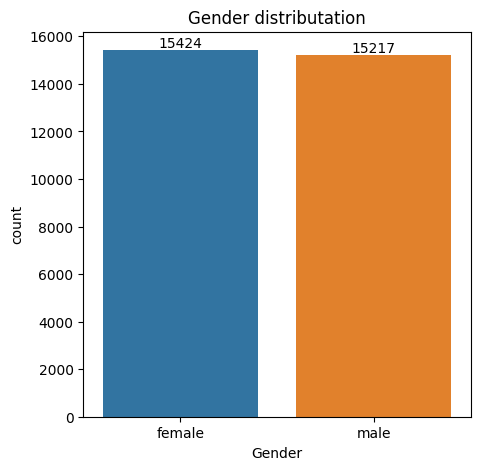

In [ ]:
plt.figure(figsize=(5,5))

plt.title('Gender distributation')
ax=sns.countplot(x='Gender', data= df)
for bars in ax.containers:
  ax.bar_label(bars)

From the above graph we have analysed that the number of females are more that of males


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


In [ ]:
df.describe()

,Unnamed: 0,NrSiblings,MathScore,ReadingScore,WritingScore
count,30641.000000,29069.000000,30641.000000,30641.000000,30641.000000
mean,499.556607,2.145894,66.558402,69.377533,68.418622
std,288.747894,1.458242,15.361616,14.758952,15.443525
min,0.000000,0.000000,0.000000,10.000000,4.000000
25%,249.000000,1.000000,56.000000,59.000000,58.000000
50%,500.000000,2.000000,67.000000,70.000000,69.000000
75%,750.000000,3.000000,78.000000,80.000000,79.000000
max,999.000000,7.000000,100.000000,100.000000,100.000000


In [ ]:
df=df.drop('Unnamed: 0',axis =1, inplace= True)


In [ ]:
gb=df.groupby('ParentEduc').agg({'MathScore':'mean','ReadingScore':'mean','WritingScore':'mean' })

In [ ]:
print(gb)

                    MathScore  ReadingScore  WritingScore
ParentEduc                                               
associate's degree  68.365586     71.124324     70.299099
bachelor's degree   70.466627     73.062020     73.331069
high school         64.435731     67.213997     65.421136
master's degree     72.336134     75.832921     76.356896
some college        66.390472     69.179708     68.501432
some high school    62.584013     65.510785     63.632409


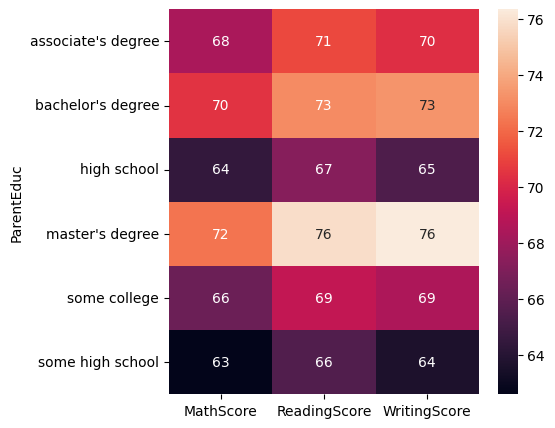

In [ ]:
plt.figure(figsize=(5,5))


sns.heatmap(gb, annot=True)
plt.show()

From the above chart we can infer that the education of parents has a good impact on the scores of their ward

In [ ]:
gb1=df.groupby('ParentMaritalStatus').agg({'MathScore':'mean','ReadingScore':'mean','WritingScore':'mean' })

In [ ]:
print(gb1)

                     MathScore  ReadingScore  WritingScore
ParentMaritalStatus                                       
divorced             66.691197     69.655011     68.799146
married              66.657326     69.389575     68.420981
single               66.165704     69.157250     68.174440
widowed              67.368866     69.651438     68.563452


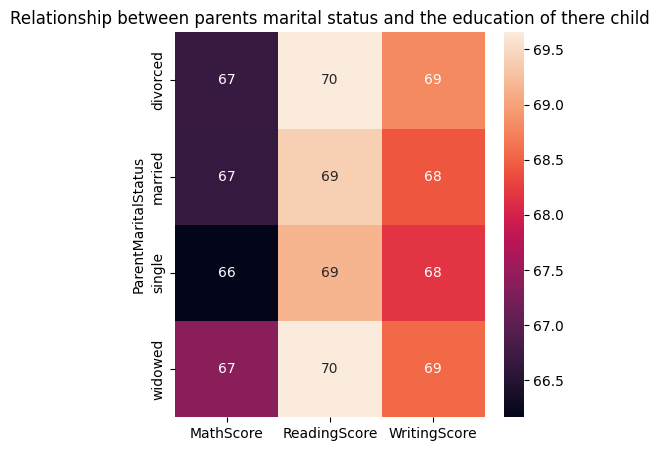

In [ ]:
plt.figure(figsize=(5,5))

plt.title('Relationship between parents marital status and the education of there child')
sns.heatmap(gb1, annot=True)
plt.show()

From the above map we can conclude that the marital ststus of the parents have neglibible/no impact on the education of their kids

In [ ]:
gb2=df.groupby('TransportMeans').agg({'MathScore':'mean','ReadingScore':'mean','WritingScore':'mean' })

In [ ]:
print(gb2)

                MathScore  ReadingScore  WritingScore
TransportMeans                                       
private         66.511354     69.472364     68.509593
school_bus      66.674636     69.446206     68.492351


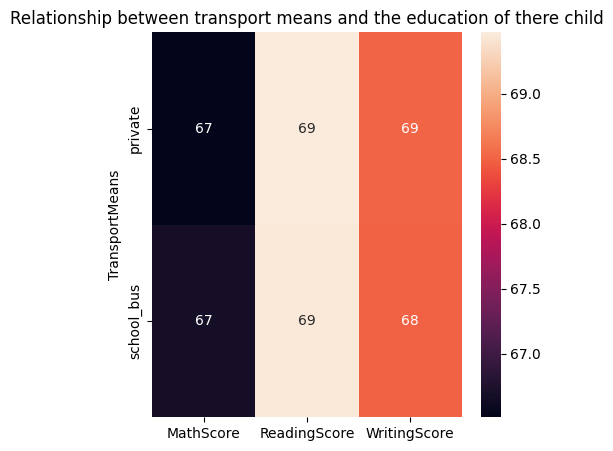

In [ ]:
plt.figure(figsize=(5,5))

plt.title('Relationship between transport means and the education of there child')
sns.heatmap(gb2, annot=True)
plt.show()

Mode of transport has no impact on the education of the childrens

In [ ]:
gb3=df.groupby('WklyStudyHours').agg({'MathScore':'mean','ReadingScore':'mean','WritingScore':'mean' })

In [ ]:
print(gb3)

                MathScore  ReadingScore  WritingScore
WklyStudyHours                                       
5 - 10          66.870491     69.660532     68.636280
< 5             64.580359     68.176135     67.090192
> 10            68.696655     70.365436     69.777778


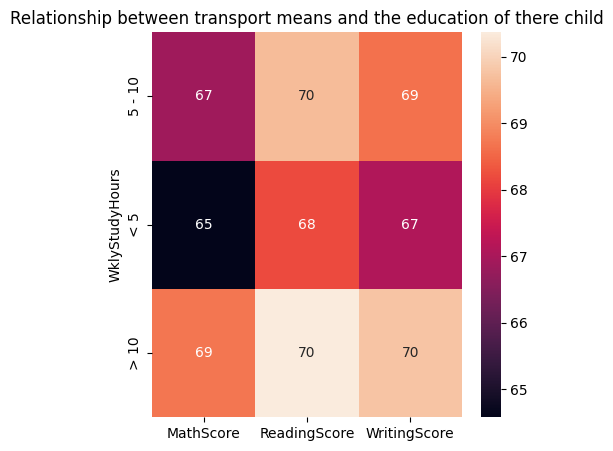

In [ ]:
plt.figure(figsize=(5,5))

plt.title('Relationship between transport means and the education of there child')
sns.heatmap(gb3, annot=True)
plt.show()

From the above map we can infer that the number of hours spent my the student has little to no impact on reading score and writing score, however there is a little impact on the number of hrs spent by the student on maths score

In [ ]:
print(df['EthnicGroup'].unique())

[nan 'group C' 'group B' 'group A' 'group D' 'group E']


[Text(0, 0, '9212'),
 Text(0, 0, '5826'),
 Text(0, 0, '2219'),
 Text(0, 0, '7503'),
 Text(0, 0, '4041')]

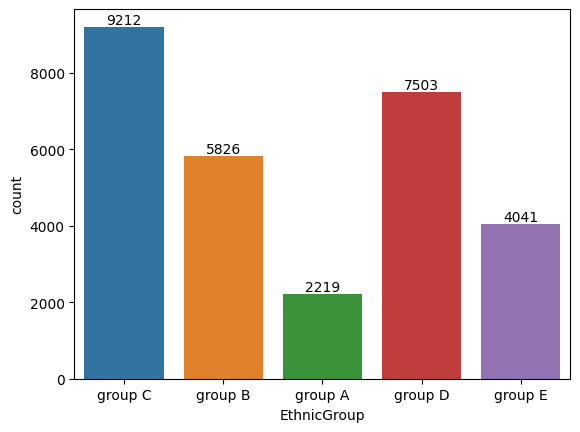

In [ ]:
ac= sns.countplot(data = df, x='EthnicGroup')
ac.bar_label(ac.containers[0])

From the above graph it is analysed  that majority of the students belongs to the ethnic group c

**THE GIVEN DATA SET IS SUCCESFULLY CLEANED AND ANALYSED.**